In [71]:
import datetime
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [63]:
cfpb_complaints = pd.read_csv("complaints_dec_2014.csv", dtype={'ZIP code': 'str', 'Complaint ID': 'str'})
cfpb_complaints["Date received"] = pd.to_datetime(cfpb_complaints["Date received"])
cfpb_complaints["Date sent to company"] = pd.to_datetime(cfpb_complaints["Date sent to company"])

In [64]:
cfpb_complaints.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN


In [65]:
cfpb_complaints[["Complaint ID", "Product"]].groupby("Product").count().rename(columns={'Complaint ID': 'Number of Complaints'})

,Number of Complaints
Product,
Bank account or service,1136
Consumer loan,578
Credit card,1100
Credit reporting,2113
Debt collection,2942
Money transfers,107
Mortgage,3002
Other financial service,14
Payday loan,141


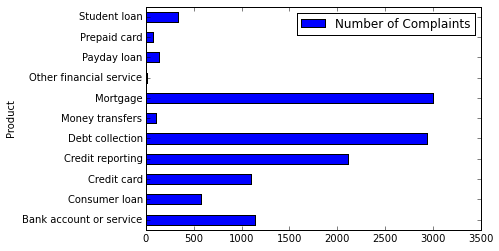

In [66]:
cfpb_complaints[["Complaint ID", "Product"]].groupby("Product").count().rename(columns={'Complaint ID': 'Number of Complaints'}).plot(kind="barh")

In [67]:
cfpb_complaints[["Complaint ID", "Company"]].groupby("Company").count().sort("Complaint ID", ascending=False).rename(columns={'Complaint ID': 'Number of Complaints'}).head(10)

,Number of Complaints
Company,
Bank of America,766
Equifax,737
Experian,675
TransUnion,604
Wells Fargo,598
JPMorgan Chase,545
Ocwen,408
Citibank,403
Nationstar Mortgage,357


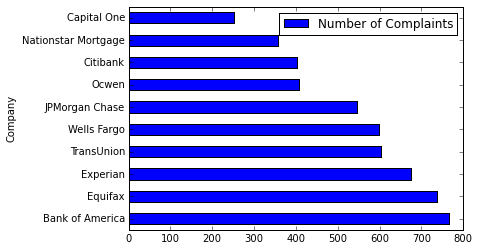

In [68]:
cfpb_complaints[["Complaint ID", "Company"]].groupby("Company").count().sort("Complaint ID", ascending=False).rename(columns={'Complaint ID': 'Number of Complaints'}).head(10).plot(kind="barh")

In [69]:
cfpb_complaints[["Complaint ID", "Company response"]].groupby("Company response").count().rename(columns={'Complaint ID': 'Number of Complaints'})

,Number of Complaints
Company response,
Closed,239
Closed with explanation,8185
Closed with monetary relief,643
Closed with non-monetary relief,1253
In progress,1056
Untimely response,167


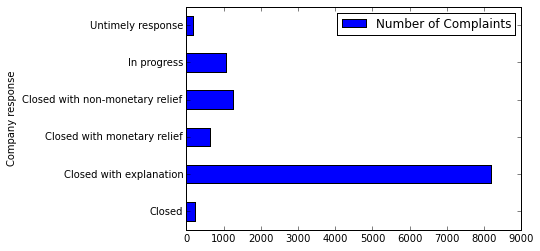

In [70]:
cfpb_complaints[["Complaint ID", "Company response"]].groupby("Company response").count().rename(columns={'Complaint ID': 'Number of Complaints'}).plot(kind="barh")

In [114]:
cfpb_complaints["Weekday of Complaint"] = cfpb_complaints["Date received"].apply(lambda x: x.weekday())

In [138]:
cfpb_complaints.replace({"Weekday of Complaint": {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}}, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'valuecount'

In [136]:
gen = (group for day, group in to_gen)
weekday = pd.DataFrame()
for day, group in gen:
    print(day)
    print(group)
    day.ignore_index = True
    weekday.append(day)
weekday

2544
2544


AttributeError: 'numpy.int64' object has no attribute 'ignore_index'

In [122]:
weekday[["Complaint ID", "Weekday of Complaint"]].groupby("Weekday of Complaint").count().rename(columns={'Complaint ID': 'Number of Complaints'}).plot(kind="barh")

KeyError: "['Complaint ID' 'Weekday of Complaint'] not in index"

In [112]:
cfpb_complaints[["Complaint ID", "Submitted via"]].groupby("Submitted via").count().rename(columns={'Complaint ID': 'Number of Complaints'})

,Number of Complaints
Submitted via,
Email,4
Fax,154
Phone,710
Postal mail,723
Referral,1603
Web,8349


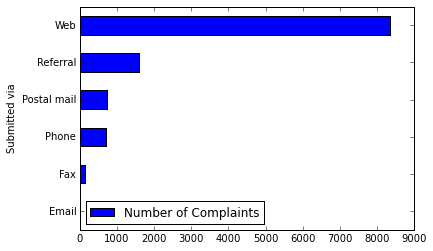

In [113]:
cfpb_complaints[["Complaint ID", "Submitted via"]].groupby("Submitted via").count().rename(columns={'Complaint ID': 'Number of Complaints'}).plot(kind="barh")